# Pizza Place Sales Analysis and Insights

This project explores pizza sales data to uncover key business insights such as revenue trends,customer demand patterns and top performing pizza types.

The analysis demonstrates data cleaning,transformation and visualization using Python.

## Pizza Sales KPIs

1. Total Revenue:$817,860.05

2. Total Quantity Sold: $49,574 pizzas

3. Total Orders Placed: 21,350

4. Number of Pizza Types: 32

5. Average Pizza Price:$16.44

In [32]:
# Importing necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [33]:
#Extract and load CSV

zip_path = r"c:\Users\HP USER\Downloads\Pizza+Place+Sales.zip"
extract_dir = r"c:\Users\HP USER\Downloads\pizza_sales_data"

In [34]:
#Extract the zip

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

In [35]:
#Load CSVs with robust encoding

def load_csv(path):
    try:
        return pd.read_csv(path, encoding="utf-8")
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="latin-1")

In [36]:
#Load all CSVs


orders = load_csv(os.path.join(extract_dir, "pizza_sales", "orders.csv"))
order_details = load_csv(os.path.join(extract_dir, "pizza_sales", "order_details.csv"))
pizzas = load_csv(os.path.join(extract_dir, "pizza_sales" ,"pizzas.csv"))
pizza_types = load_csv(os.path.join(extract_dir, "pizza_sales", "pizza_types.csv"))

In [37]:
#create order date_time colunm

orders["order_datetime"] = pd.to_datetime(
orders["date"].astype(str) + ' ' + orders["time"].astype(str),
errors = "coerce"                                            
)                                                

In [38]:
# Merge all datasets

merged = order_details.merge(orders[['order_id', 'order_datetime']], on = 'order_id', how ='left')
merged = merged.merge(pizzas, on = 'pizza_id', how = 'left')
merged = merged.merge(pizza_types, on = 'pizza_type_id', how = 'left')

In [39]:
merged

,order_details_id,order_id,pizza_id,quantity,order_datetime,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [40]:
merged.head() #checking first 5 rows for any irregularities

,order_details_id,order_id,pizza_id,quantity,order_datetime,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [41]:
merged.isna().sum() #checking for null values

order_details_id    0
order_id            0
pizza_id            0
quantity            0
order_datetime      0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [42]:
merged.duplicated().sum() # checking for duplicates

np.int64(0)

In [43]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   order_datetime    48620 non-null  datetime64[ns]
 5   pizza_type_id     48620 non-null  object        
 6   size              48620 non-null  object        
 7   price             48620 non-null  float64       
 8   name              48620 non-null  object        
 9   category          48620 non-null  object        
 10  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 4.1+ MB


In [44]:
# Compute Revenue

merged['quantity'] =pd.to_numeric(merged['quantity'], errors='coerce').fillna(0).astype(int)
merged['price'] =pd.to_numeric(merged['price'], errors='coerce').fillna(0.0)
merged['revenue'] = merged['quantity'] * merged['price']

In [45]:
merged.describe()

,order_details_id,order_id,quantity,order_datetime,price,revenue
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-30 03:28:34.933833984,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 11:38:36,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 15:34:31,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 19:50:30,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 18:39:55,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 23:02:05,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


#### No significant missing or duplicate values found.

#### Colunms were converted to numeric where necessary. 

## Q1. Total Revenue/Sales


In [46]:
#  Step 3 :Analysis

#1. Total revenue/sales?

total_revenue = merged["revenue"].sum()
print("Total Revenue(Sales):$",round(total_revenue, 2))

Total Revenue(Sales):$ 817860.05



* The total revenue generated from pizza sales is **$ 817860.05**

 


## Q2. Total Quantity Sold


In [47]:
# 2. Total quantity sold 

total_quantity = merged['quantity'].sum()
print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 49574



* A total of **49,574 pizzas** were sold

# Q3. Total Order Placed


In [48]:
#3 Total Orders

total_orders = orders["order_id"].nunique()
print("Total Orders:",total_orders)

Total Orders: 21350



* There were **21,350 unique orders** placed

## Q4. Number of Pizza Types 

In [49]:
# 4. Number Of Pizza Types

num_pizza_types = pizza_types['pizza_type_id'].nunique()
print("Number of Pizza Types:",num_pizza_types)

Number of Pizza Types: 32




* The restaurant offers **32 different pizza types**

## Q5. Average Price of Pizzas

In [50]:
# 5. Average price  of Pizzas

avg_price = pizzas["price"].mean()
print("Average Pizza Price: $",round(avg_price, 2))

Average Pizza Price: $ 16.44




* The average listed price of pizzas is **$16.44**

## Q6.Peak Hours of Sales 

In [51]:
# 6. Peak Hours of sales
merged['hour'] = merged["order_datetime"].dt.hour
peak_hours = merged.groupby("hour")["revenue"].sum().sort_values(ascending=False).head(5)
print(peak_hours)

hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
Name: revenue, dtype: float64


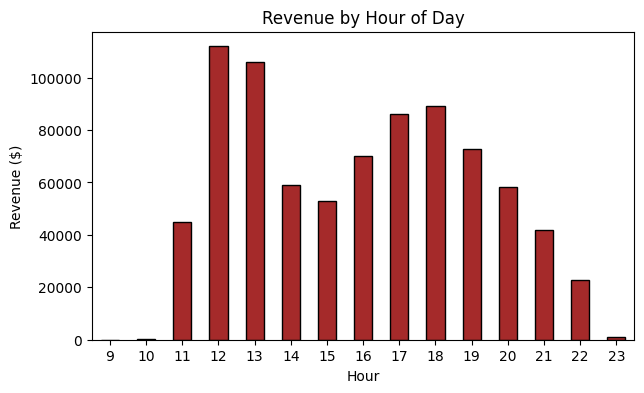

In [52]:
# Visualization
hourly_sales = merged.groupby(merged['order_datetime'].dt.hour)['revenue'].sum()
plt.figure(figsize=(7,4))
hourly_sales.plot(kind='bar', color= 'brown', edgecolor='black')
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue ($)") 
plt.xticks(rotation=0)
plt.show()



* Peak hours are **12:00-13:00 (lunch) and 17:00-19:00(dinner).**

## Q7. Sales by Day of the Week

In [53]:
# 7. Sales by Day of the week

merged["day_of_week"] = merged["order_datetime"].dt.day_name()
dow_sales = merged.groupby("day_of_week")["revenue"].sum().sort_values(ascending=False)
print(dow_sales)
print("Best day:", dow_sales.idxmax()) 

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64
Best day: Friday


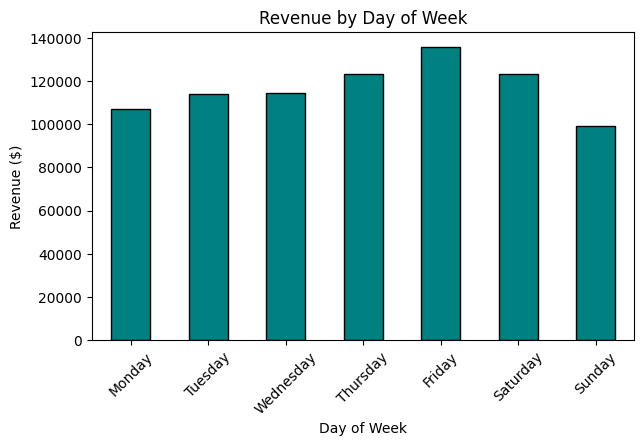

In [54]:
# Visualization
dow_order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_sales = merged.groupby(merged['order_datetime'].dt.day_name())['revenue'].sum().reindex(dow_order)
plt.figure(figsize=(7,4))
dow_sales.plot(kind='bar', color= 'teal', edgecolor='black')
plt.title("Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Revenue ($)") 
plt.xticks(rotation=45)
plt.show()



* **Friday** is the best day (~$136k revenue),followed by **Thursday** and **Saturday**

## Q8. Top 5 Bestselling Pizzas


In [55]:
# 8. Top 5 Bestselling Pizzas 

merged['pizza_label'] = merged['name'] + " (" + merged['size'] + ")" 
top5_pizzas = merged.groupby('pizza_label')['quantity'].sum().sort_values(ascending=False).head(5)
print(top5_pizzas)


pizza_label
The Big Meat Pizza (S)          1914
The Thai Chicken Pizza (L)      1410
The Five Cheese Pizza (L)       1409
The Four Cheese Pizza (L)       1316
The Classic Deluxe Pizza (M)    1181
Name: quantity, dtype: int64


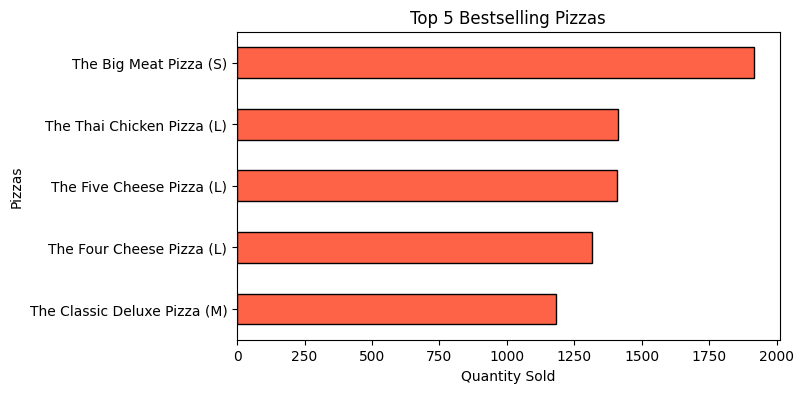

In [56]:
# Visualization

top5_pizzas = merged.groupby('pizza_label')['quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(7,4))
top5_pizzas.plot(kind='barh', color= 'tomato', edgecolor='black')
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Quantity Sold")
plt.ylabel("Pizzas") 
plt.gca().invert_yaxis()
plt.show()


1.The Big Meat Pizza (S) : 1,914

2.The Thai Chicken Pizza (L) : 1,410

3.The Five Cheese Pizza (L) : 1,409

4.The Four Cheese Pizza (L) :1,316

5.The Classic Deluxe Pizza (M) : 1,181

## Q9. Montly Sales Trend

In [57]:
# 9. Monthly Sales Trend

merged['month'] = merged['order_datetime'].dt.to_period('M')
monthly_sales = merged.groupby('month')['revenue'].sum() 
print(monthly_sales)

month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: revenue, dtype: float64


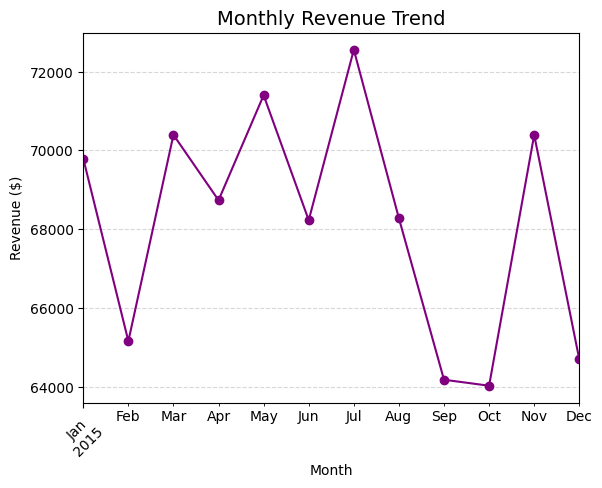

In [58]:
# Visualization

monthly_sales.plot(marker='o',color='purple')
plt.title("Monthly Revenue Trend", fontsize=14) 
plt.xlabel("Month")
plt.ylabel("Revenue ($)") 
plt.xticks(rotation=45)
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()


* Monthly revenue ranges between **64k** and **72k**,averaging ~$68k.



## Q10. Underperforming Pizza Types

In [59]:
# 10 Underperforming Pizza Types
type_performance = merged.groupby('name')['revenue'].sum().sort_values() 
print(type_performance.head(5))

name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: revenue, dtype: float64


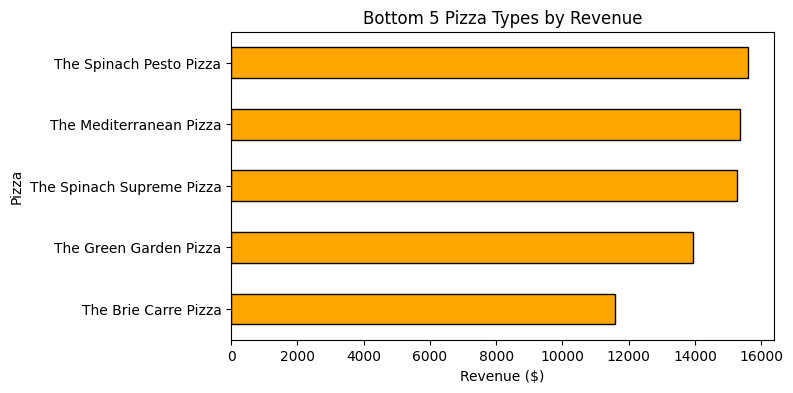

In [60]:
# Visualization 

bottom5_pizzas = merged.groupby('name')['revenue'].sum().sort_values().head(5) 
plt.figure(figsize=(7,4)) 
bottom5_pizzas.plot(kind='barh', color='orange',edgecolor='black')
plt.title("Bottom 5 Pizza Types by Revenue")
plt.xlabel("Revenue ($)") 
plt.ylabel("Pizza")
plt.show()



#### Lowest revenue pizzas:

* The Brie Carre Pizza ~ $11,589

* The Green Garden Pizza ~ $13,956

* The Spinach Supreme Pizza ~ $15,278

# Pizza Sales Analysis(Markdown Report)

### Q1. Total Revenue/Sales

* The total revenue enated from pizza sales is **$817,860.05**.

* With over **21,000** orders this equals an average order value of about $38.3.

* Sales are driven by **lunch and dinner peaks** aand **end of week demand**

### Q2. Total Quantity Sold 

* A Total of **49,574** pizzas were sold.

* On average, each order contains about **2-3** pizzas.

* This confirms a steady demand throught the year.

### Q3.Total Orders Placed

* There were **21,350** unique orders placed.

* This provides a baseline for customer demand and capacity planning.

* Combined with revenue, it indicates an average revenue of **~$38** per order.


### Q4. Number of Pizza Types 

* The restaurant offers **32 different pizza types**

* A diverse menu increases customer choice but can also spread sales unevenly across items

### Q5. Average Price of Pizzas

* The average listed price of pizzas is **$16.44**.

* The weighted average selling price(based on actual sales volume) is identical **$16,50**.

* This shows a consistent pricing across the menu
 

### Q6.Peak Hours of Sales 

* Peak hours are **12:00-13:00 (lunch) and 17:00-19:00(dinner).**

* **12PM** generated the highest revenue at ~$111,878.

* These time windows are critical for staffing,kitchen prep and promotions.


### Q7. Sales by Day of the Week

* **Friday** is the strongest day (**~$136k** revenue).

* **Thursday** and **Saturday** also perform well,both around **$123k**.

* **Sunday** is the weakest day (~**$99k** revenue).

* This suggests a strong end of week demand surge


### Q8. Top 5 Bestselling Pizzas

1. The Big Meat Pizza (S) : 1,914 sold

2. The Thai Chicken Pizza (L) : 1,410 sold

3. The Five Cheese Pizza (L) : 1,409 sold

4. The Four Cheese Pizza (L) :1,316 sold

5. The Classic Deluxe Pizza (M) : 1,181 sold

* Bestsellers are dominated by **meat and cheese** varieties, showing customer preference for rich,classic flavours.



### Q9. Montly Sales Trend
* Monthly revenue ranges between **64k** and **72k** averaging ~$68k.

* The trend is relatively **stable** across te year with small fluctuations

* This consistency suggests the pizza place has steady demand,but no strong growth drivers. 



### Q10. Underperforming Pizza Types

#### Lowest revenue pizzas:

* The Brie Carre Pizza ~ $11,589

* The Green Garden Pizza ~ $13,956

* The Spinach Supreme Pizza ~ $15,278

* These pizzas contribute very little to total revenue and may require **menu redesign,re-marketing or total removal**.


### This analysis reveals that revenue is driven by a few top-performing pizzas and weekend sales peaks.

### Future work could involve customer segmentation or predictive modeling.